In [42]:
import json
import networkx as nx
import pandas as pd
import matplotlib.colors as mcolors

# Load JSON data from file
data = pd.read_csv('AlgoWiki algorithms (our copy) - Reductions.csv')

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph from the JSON data
for index, item in data.iterrows():
    G.add_edge(item['From (Variation)'], item['To (Variation)'])

In [43]:
sccs_dag = nx.condensation(G)
# list of source nodes in the DAG
sources = [node for node, in_degree in sccs_dag.in_degree() if in_degree == 0]
for source in sources:
    print(sccs_dag.nodes[source]['members'])

{'CNF-SAT'}
{'OV', 'Partial Match'}
{'MOV'}
{'UOV'}
{"3SUM'", 'Mono Convolution', 'Exact Weight 3-Star Detection', 'Exact Weight 3-Matching Detection', '3-Partite 3LDT', '1-Partite 3LDT', '#3SUM', 'All-Integers 3SUM', 'GeomBase', '3SUM'}
{'Triangle Detection'}
{'Combinatorial BMM', 'Combinatorial Triangle Detection', 'CFG Parsing'}
{'Negative Triangle Search'}
{'Negative Triangle Listing'}
{'Minimum Witness Finding'}
{'All Pairs Minimum Witness (APMW)'}
{'Minimum Weight Triangle'}
{'Nondecreasing Triangle'}
{'$(\\min, \\leq)$ Product'}
{'Directed Radius'}
{'Undirected Radius'}
{'Directed Median'}
{'Undirected Median'}
{'MAX-CNF-SAT'}
{'OuMv'}
{'k-Clique'}
{'Maximum Inner Product Search'}


In [44]:
# list top 20 longest shortest paths in sccs_dag
longest_shortest_paths = []
copy_sccs_dag = sccs_dag.copy()
for i in range(10):
    longest_shortest_path = nx.dag_longest_path(copy_sccs_dag)
    longest_shortest_paths.append(
        longest_shortest_path
    )
    copy_sccs_dag.remove_node(longest_shortest_path[-1])

for path in longest_shortest_paths:
    for node in path:
        print(sccs_dag.nodes[node]['members'], end=' -> ')
    print()

{"3SUM'", 'Mono Convolution', 'Exact Weight 3-Star Detection', 'Exact Weight 3-Matching Detection', '3-Partite 3LDT', '1-Partite 3LDT', '#3SUM', 'All-Integers 3SUM', 'GeomBase', '3SUM'} -> {'Set Disjointness'} -> {'Set Intersection'} -> {'Triangle Listing'} -> {'Vertex Triangle Listing'} -> {'Induced Subgraph Problem', 'Dictionary Matching with One Gap*'} -> {'Dictionary Matching with One Gap'} -> 
{"3SUM'", 'Mono Convolution', 'Exact Weight 3-Star Detection', 'Exact Weight 3-Matching Detection', '3-Partite 3LDT', '1-Partite 3LDT', '#3SUM', 'All-Integers 3SUM', 'GeomBase', '3SUM'} -> {'Set Disjointness'} -> {'Set Intersection'} -> {'Triangle Listing'} -> {'Vertex Triangle Listing'} -> {'Induced Subgraph Problem', 'Dictionary Matching with One Gap*'} -> 
{"3SUM'", 'Mono Convolution', 'Exact Weight 3-Star Detection', 'Exact Weight 3-Matching Detection', '3-Partite 3LDT', '1-Partite 3LDT', '#3SUM', 'All-Integers 3SUM', 'GeomBase', '3SUM'} -> {'Convolution 3SUM', '#Convolution-3SUM'} -> {'

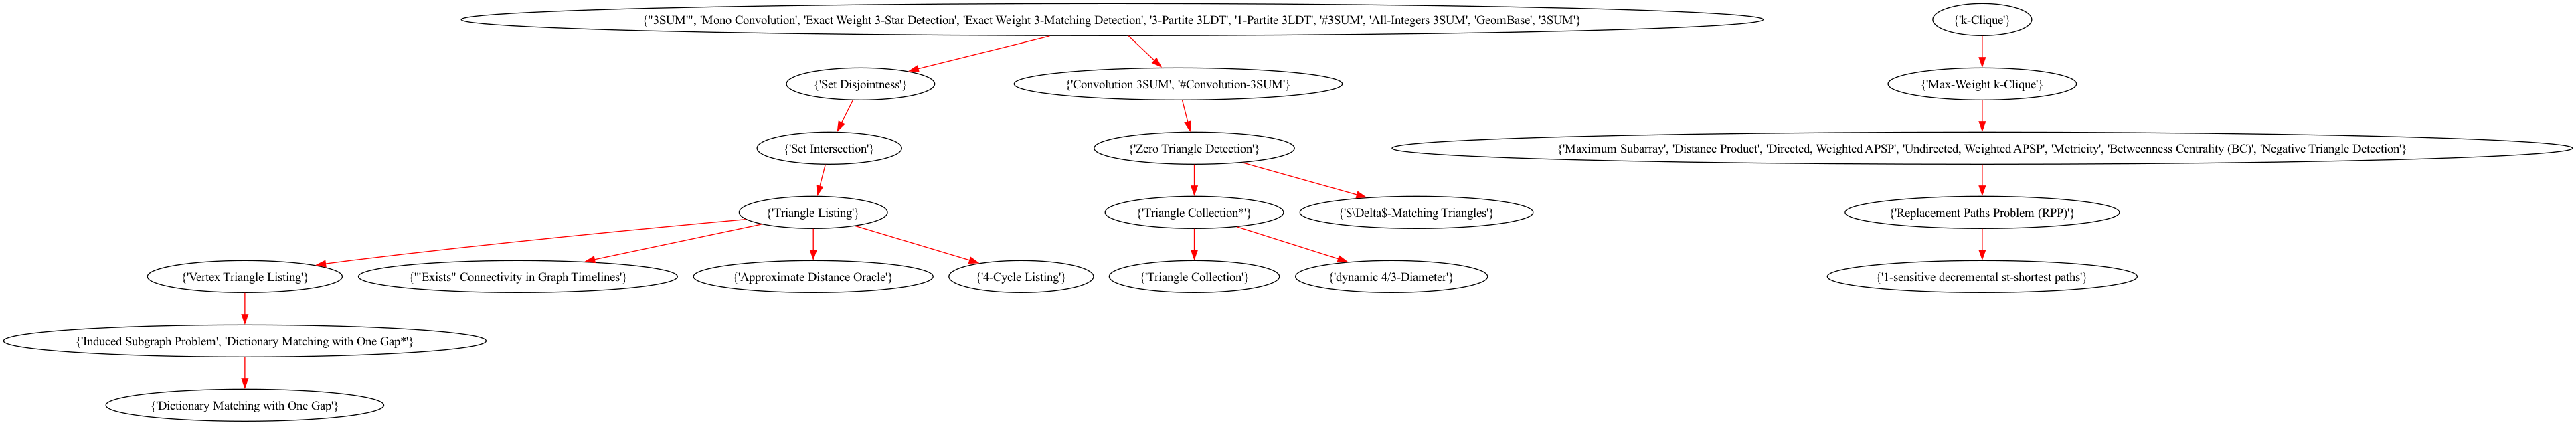

In [45]:
# plot longest shortest paths
import pygraphviz as pgv
import IPython.display as Image

A = pgv.AGraph(strict=True, directed=True)

# highlight longest shortest paths
for path in longest_shortest_paths:
    for i in range(len(path) - 1):
        A.add_edge(
            sccs_dag.nodes[path[i]]['members'],
            sccs_dag.nodes[path[i + 1]]['members'],
            color='red')


A.layout(prog='dot')
filename = "./longest_path_tree.png"
A.draw(filename)

Image.display(Image.Image(filename))



In [46]:
# list top 20 most impactful new edge by largest SCC size
impactful_edges = []

for source in G.nodes:
    for target in G.nodes:
        if source != target:
            copy_G = G.copy()
            copy_G.add_edge(source, target)
            # get the length of the largest SCC
            largest_scc = max(nx.strongly_connected_components(copy_G), key=len)
            impactful_edges.append(
                {
                    'from': source,
                    'to': target,
                    'size': len(largest_scc)
                }
            )

impactful_edges = sorted(impactful_edges, key=lambda x: x['size'], reverse=True)

for i in range(50):
    print(impactful_edges[i])

impactful_edges_by_size = impactful_edges

{'from': 'Dictionary Matching with One Gap', 'to': '3SUM', 'size': 19}
{'from': 'Dictionary Matching with One Gap', 'to': "3SUM'", 'size': 19}
{'from': 'Dictionary Matching with One Gap', 'to': 'GeomBase', 'size': 19}
{'from': 'Dictionary Matching with One Gap', 'to': 'Exact Weight 3-Star Detection', 'size': 19}
{'from': 'Dictionary Matching with One Gap', 'to': 'Exact Weight 3-Matching Detection', 'size': 19}
{'from': 'Dictionary Matching with One Gap', 'to': '1-Partite 3LDT', 'size': 19}
{'from': 'Dictionary Matching with One Gap', 'to': '3-Partite 3LDT', 'size': 19}
{'from': 'Dictionary Matching with One Gap', 'to': 'All-Integers 3SUM', 'size': 19}
{'from': 'Dictionary Matching with One Gap', 'to': 'Mono Convolution', 'size': 19}
{'from': 'Dictionary Matching with One Gap', 'to': '#3SUM', 'size': 19}
{'from': 'Induced Subgraph Problem', 'to': '3SUM', 'size': 18}
{'from': 'Induced Subgraph Problem', 'to': "3SUM'", 'size': 18}
{'from': 'Induced Subgraph Problem', 'to': 'GeomBase', 'si

In [47]:
# list top 20 most impactful new edge by number of SCCs
impactful_edges = []

for source in G.nodes:
    for target in G.nodes:
        if source != target:
            copy_G = G.copy()
            copy_G.add_edge(source, target)
            # number of SCCs with length > 1
            num_sccs = len([scc for scc in nx.strongly_connected_components(copy_G) if len(scc) > 1])
            impactful_edges.append(
                {
                    'from': source,
                    'to': target,
                    'size': num_sccs
                }
            )

impactful_edges = sorted(impactful_edges, key=lambda x: x['size'], reverse=False)

for i in range(50):
    print(impactful_edges[i])

impactful_edges_by_num_sccs = impactful_edges

{'from': 'Induced Subgraph Problem', 'to': '3SUM', 'size': 7}
{'from': 'Induced Subgraph Problem', 'to': "3SUM'", 'size': 7}
{'from': 'Induced Subgraph Problem', 'to': 'GeomBase', 'size': 7}
{'from': 'Induced Subgraph Problem', 'to': 'Exact Weight 3-Star Detection', 'size': 7}
{'from': 'Induced Subgraph Problem', 'to': 'Exact Weight 3-Matching Detection', 'size': 7}
{'from': 'Induced Subgraph Problem', 'to': '1-Partite 3LDT', 'size': 7}
{'from': 'Induced Subgraph Problem', 'to': '3-Partite 3LDT', 'size': 7}
{'from': 'Induced Subgraph Problem', 'to': 'All-Integers 3SUM', 'size': 7}
{'from': 'Induced Subgraph Problem', 'to': 'Mono Convolution', 'size': 7}
{'from': 'Induced Subgraph Problem', 'to': '#3SUM', 'size': 7}
{'from': 'Dictionary Matching with One Gap*', 'to': '3SUM', 'size': 7}
{'from': 'Dictionary Matching with One Gap*', 'to': "3SUM'", 'size': 7}
{'from': 'Dictionary Matching with One Gap*', 'to': 'GeomBase', 'size': 7}
{'from': 'Dictionary Matching with One Gap*', 'to': 'Exac

In [48]:
ORIGINAL_SCCS = nx.strongly_connected_components(G)
ORIGINAL_SCCS = [scc for scc in ORIGINAL_SCCS if len(scc) > 1]
ORIGINAL_SCCS

colors_options = mcolors.TABLEAU_COLORS #[{'color': '#FFFFFF'}] this is a list of objects
# apply opacity to colors 
colors_options = [c + 'CC' for c in colors_options.values()]
# set a color for each scc
colors = {}
for i, scc in enumerate(ORIGINAL_SCCS):
    for node in scc:
        colors[node] = colors_options[i]

colors

{'Diameter': '#1f77b4CC',
 'Positive Betweenness Centrality': '#1f77b4CC',
 'Approximate Betweenness Centrality': '#1f77b4CC',
 'Reach Centrality': '#1f77b4CC',
 'OV': '#ff7f0eCC',
 'Partial Match': '#ff7f0eCC',
 'Visible Triangle': '#2ca02cCC',
 'Hole in Union': '#2ca02cCC',
 'Triangles Cover Triangle': '#2ca02cCC',
 'Point on 3 Lines': '#d62728CC',
 '3 Points on Line': '#d62728CC',
 'Induced Subgraph Problem': '#9467bdCC',
 'Dictionary Matching with One Gap*': '#9467bdCC',
 'Convolution 3SUM': '#8c564bCC',
 '#Convolution-3SUM': '#8c564bCC',
 "3SUM'": '#e377c2CC',
 'Mono Convolution': '#e377c2CC',
 'Exact Weight 3-Star Detection': '#e377c2CC',
 'Exact Weight 3-Matching Detection': '#e377c2CC',
 '3-Partite 3LDT': '#e377c2CC',
 '1-Partite 3LDT': '#e377c2CC',
 '#3SUM': '#e377c2CC',
 'All-Integers 3SUM': '#e377c2CC',
 'GeomBase': '#e377c2CC',
 '3SUM': '#e377c2CC',
 'Maximum Subarray': '#7f7f7fCC',
 'Distance Product': '#7f7f7fCC',
 'Directed, Weighted APSP': '#7f7f7fCC',
 'Undirected, Wei

In [49]:
import pygraphviz as pgv
import IPython.display as Image
from slugify import slugify


def plot_sccs(G, filename, source, target):
    A = pgv.AGraph(strict=True, directed=True)

    for node in G.nodes:
        if node in colors:
            A.add_node(
                node,
                # background color
                style='filled',
                fillcolor=colors[node]
                
            )
        else:
            A.add_node(
                node
            )

    for edge in G.edges:
        if edge[0] == source and edge[1] == target:
            A.add_edge(
                edge[0],
                edge[1],
                color='red'
            )
        else:
            A.add_edge(
                edge[0],
                edge[1]
            )

    A.layout(prog='dot')
    filename = filename
    A.draw(filename)

    return Image.Image(filename)


def G_with_new_edge(G, source, target, value, folder):
    G_copy = G.copy()
    G_copy.add_edge(source, target)
    # plot only sccs with size > 1 in the same graph
    SCCS = nx.strongly_connected_components(G_copy)
    SCCS = [scc for scc in SCCS if len(scc) > 1]

    G_sccs = nx.DiGraph()

    for scc in SCCS:
        for node in scc:
            G_sccs.add_node(node)

        for node in scc:
            for neighbor in G_copy.neighbors(node):
                if neighbor in scc:
                    G_sccs.add_edge(
                        node,
                        neighbor
                    )
    source = slugify(source)
    target = slugify(target)
    plot_sccs(G_sccs, folder + '/' +
              str(value) + ' = ' + source + ' -> ' + target + '.png', source, target)

impactful_edges_by_size_filtered = [edge for edge in impactful_edges_by_size if edge['size'] > 10]
impactful_edges_by_num_sccs_filtered = [edge for edge in impactful_edges_by_num_sccs if edge['size'] < 9]


for i in range(len(impactful_edges_by_size_filtered)):
    G_with_new_edge(G, impactful_edges_by_size[i]['from'], impactful_edges_by_size[i]
                    ['to'], impactful_edges_by_size[i]['size'], 'impactful_edges_by_size')

for i in range(len(impactful_edges_by_num_sccs_filtered)):
    G_with_new_edge(G, impactful_edges_by_num_sccs[i]['from'], impactful_edges_by_num_sccs[i]
                    ['to'], impactful_edges_by_num_sccs[i]['size'], 'impactful_edges_by_num_sccs')
    


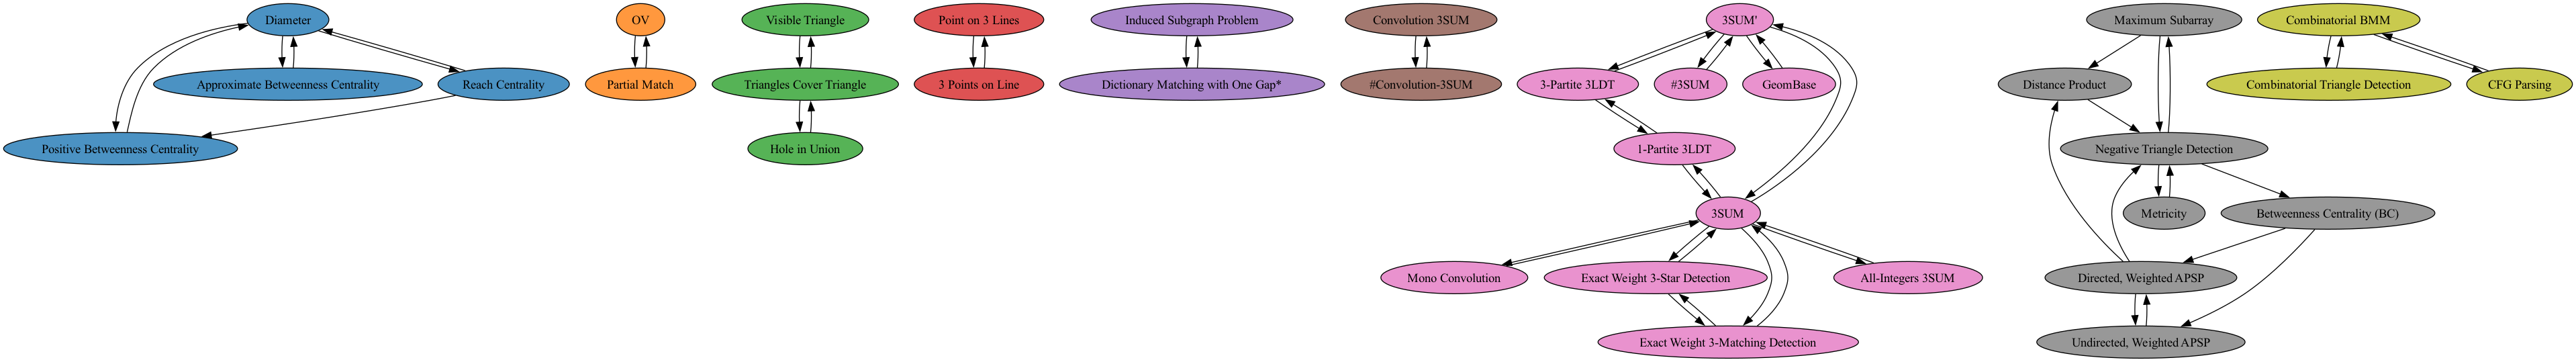

In [50]:
SCCS = nx.strongly_connected_components(G)
SCCS = [scc for scc in SCCS if len(scc) > 1]

G_sccs = nx.DiGraph()

for scc in SCCS:
    for node in scc:
        G_sccs.add_node(node)

    for node in scc:
        for neighbor in G.neighbors(node):
            if neighbor in scc:
                G_sccs.add_edge(
                    node,
                    neighbor
                )

plot_sccs(G_sccs, 'original_sccs.png', None, None)

In [51]:
size_of_largest_scc_table = ''

# generate a markdown table for the top 20 most impactful new edges by largest SCC size
size_of_largest_scc_table += ('| Size of the Largest SCC | From | To | Graph |\n')
size_of_largest_scc_table += ('| --- | --- | --- | --- |\n')
for i in impactful_edges_by_size_filtered:
    # THIS IS AN LINK EXAMPLE https://github.com/andrewlucasgs/algorithms-reductions/blob/main/impactful_edges_by_size/10%20%3D%201-sensitive%20decremental%20st-shortest%20paths%20-%3E%20k-Clique.png
    size_of_largest_scc_table += (f'| {i["size"]} | {i["from"]} | {i["to"]} | <a href="https://github.com/andrewlucasgs/algorithms-reductions/blob/main/impactful_edges_by_size/{i["size"]} = {i["from"]} -> {i["to"]}.png">Graph</a> |\n')

# write the markdown table to a file
with open('impactful_edges_by_size_table.md', 'w') as f:
    f.write(size_of_largest_scc_table)

In [52]:
# generate a markdown table for the top 20 most impactful new edges by number of SCCs
num_sccs_table = ''

num_sccs_table += ('| Number of SCCs | From | To | Graph |\n')
num_sccs_table += ('| --- | --- | --- | --- |\n')
for i in impactful_edges_by_num_sccs_filtered:
    num_sccs_table += (f'| {i["size"]} | {i["from"]} | {i["to"]} | <a href="https://github.com/andrewlucasgs/algorithms-reductions/blob/main/impactful_edges_by_num_sccs/{i["size"]} = {i["from"]} -> {i["to"]}.png">Graph</a> |\n')
    
with open('num_sccs_table.md', 'w') as f:
    f.write(num_sccs_table)